In [64]:
import networkx as nx
from IPython.display import Image
from pprint import pprint
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import community

#Edges : Source Target
csvfile = open('edgesfb.csv', 'r')
jsonfile = open('TEST1.json', 'w')
fieldnames = ("FirstName","LastName","IDNumber","Message","Note1","Note2",'a','b','c','d')
reader = csv.DictReader( csvfile, fieldnames)
out = json.dumps( [ row for row in reader ] )
jsonfile.write(out)
r=json.load(open('TEST1.json')) 
q=pd.DataFrame(r)
p=pd.DataFrame(q.Note2.value_counts())
s=pd.DataFrame(q.Note1.value_counts())
list1=[]
list2=[]
list5=[]
list6=[]
for i in p.index:
    list1.append(i)
    list2.append(p.Note2[i])
for j in s.index:
    list5.append(j)
    list6.append(s.Note1[j]) 
    
    
#nodes : Id    
csvfile = open('nodesfb.csv', 'r')
jsonfile = open('TEST2.json', 'w')
fieldnames = ("FirstName","LastName","IDNumber","Message","Note1","Note2",'a','b','c','d')
reader = csv.DictReader( csvfile, fieldnames)
out = json.dumps( [ row for row in reader ] )
jsonfile.write(out)
r1=json.load(open('TEST2.json')) 
q1=pd.DataFrame(r1)
p1=pd.DataFrame(q1.Note1.value_counts())
list3=[]
list4=[]
for i in p1.index:
    list3.append(i)
    list4.append(p1.Note1[i])

o=0
#list1 dan 5
list7=[]
list8=[]
for k in list3:
    if list3[o] in list5:
        if list3[o] in list1:
            list8.append(list6[list5.index(k)]+list2[list1.index(k)])
           
        else:
            list8.append(list6[list5.index(k)])
  
    elif  list3[o] in list1:
            list8.append(list2[list1.index(k)])

    else:
        list8.append(1)
    list7.append(list3[o])
    o+=1
list9=[]
list10=[]
x=0
for i in q['Note2']:
    list9.append(i)
    list10.append(q['Note1'][x])
    x+=1

#list1 = nama di edges target
#list2 = degree list1
#list3 = nama di nodes ID
#ist4 = degree list3
#list5 = nama di edges source
#list6 = degree list5
#list7 = nama di nodes ID
#list8 = degree nodes ID keseluruhan
#list9 = nama di edges target keseluruhan
#list10 = nama di edges source keseluruhan

In [97]:
list7

['FB_pas',
 'FB_100000355956072',
 'FB_cagubhumoris',
 'FB_satu',
 'FB_rizaleffendy',
 'FB_100017472304267',
 'FB_annurforkaltim1',
 'FB_100011748301014',
 'FB_100009556542769',
 'FB_calonwakilgubernurkaltim',
 'FB_nenimoerniaeni',
 'FB_4trs',
 'FB_tenggarong',
 'FB_makerannnur',
 'FB_cagubkaltim',
 'FB_kaltim5ehat',
 'FB_100009947077725',
 'FB_https://www.instagram.com/iamanshaikh/',
 'FB_1829754940',
 'FB_1969303259995876',
 'FB_100002579638930',
 'FB_kami',
 'FB_jadi_annur',
 'FB_gojekliga1',
 'FB_kutim',
 'FB_100000982100035',
 'FB_timmekerannur',
 'FB_rizalefendi',
 'FB_hotelbumisegah',
 'FB_kitasatuuntukkaltim',
 'FB_100014020039486',
 'FB_bontang',
 'FB_psjavbrneo',
 'FB_beraniberkarya',
 'FB_kenapasukagembungpanglima',
 'FB_paslonno1',
 'FB_100024600247175',
 'FB_macan',
 'FB_100009862147413',
 'FB_100013740519356',
 'FB_reso',
 'FB_kaltimterkini',
 'FB_1115886302',
 'FB_beraniusaha',
 'FB_terbaikindonesia',
 'FB_ketuaampgbontang',
 'FB_100019644690522',
 'FB_pesisirdukungannur

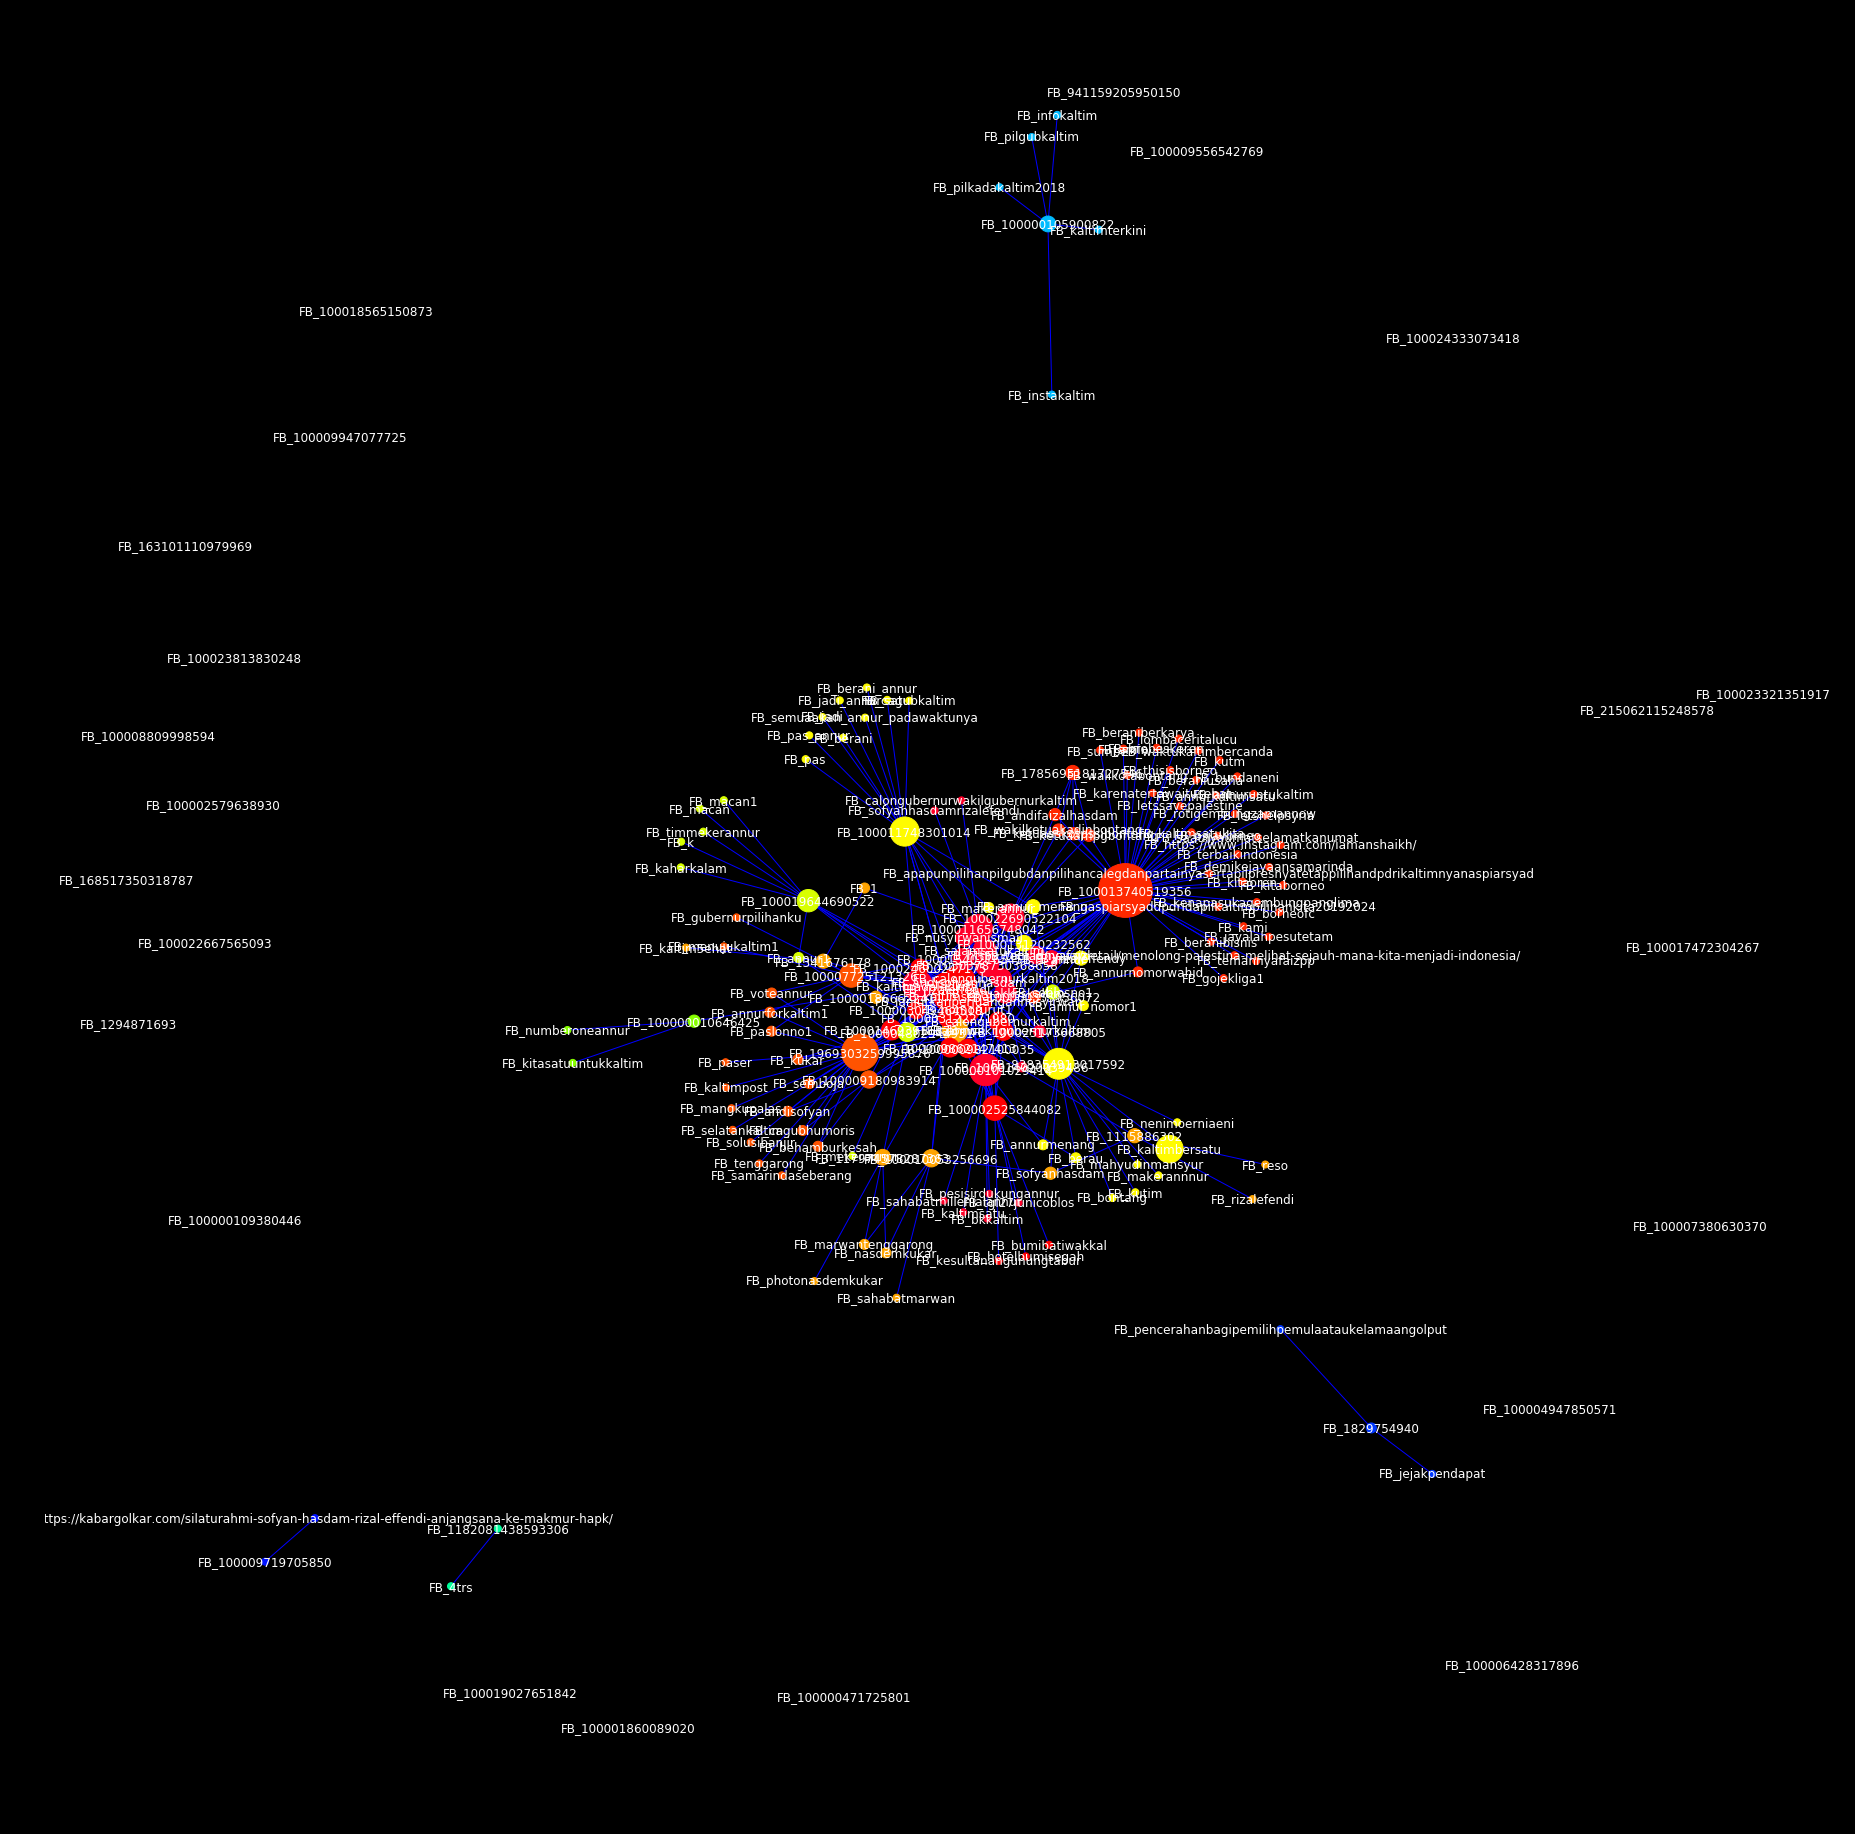

In [87]:
n=0
b=0
t=[]

x =nx.Graph() #accuration nodes and edges
GG =nx.Graph() #the real graph

for j in r1:
    if b>=1:
        try:
            x.add_node(j['Note1']) 
      
        except:
            pass
            
    b+=1

for i in range(len(list7)):
      for j in range(len(list10)):
        if list7[i] == list10[j] :
            x.add_edges_from([(list7[i],list9[j])])
            

for i in range(len(list7)):
      for j in range(len(list9)):
        if list7[i] == list9[j] :
            x.add_edges_from([(list7[i],list10[j])])

for j in range(len(x.nodes)):
    GG.add_node(list(x.nodes)[j])
    t.append(x.degree[list(x.nodes)[j]])

for i in range(len(list7)):
      for j in range(len(list10)):
        if list7[i] == list10[j] :
            GG.add_edges_from([(list7[i],list9[j])])
            
for i in range(len(list7)):
      for j in range(len(list9)):
        if list7[i] == list9[j] :
            GG.add_edges_from([(list7[i],list10[j])])

size=[]
try:
    size=[t[j]*50 for j in range(len(GG.nodes)-1)]

except :
     print('sorry')

part = community.best_partition(GG,resolution=1)
values1 = [part.get(node) for node in GG.nodes()]

pos=nx.spring_layout(GG,k=0.13)

fig= plt.figure(figsize=(25,25))



nx.draw(GG,pos,node_size=size,node_color = values1,edge_color='b',
        font_color='white', with_labels=True, node_shape='o',cmap = plt.get_cmap('gist_rainbow'))
fig.set_facecolor("black")


plt.axis('off')

#plt.savefig('yourname.png', facecolor=fig.get_facecolor() )

plt.show()


In [86]:
GG.edges

EdgeView([('FB_100022690522104', 'FB_1_annur'), ('FB_100022690522104', 'FB_kaltimadalahkita'), ('FB_100022690522104', 'FB_salamsatukaltim'), ('FB_100022690522104', 'FB_andisofyanhasdam'), ('FB_100022690522104', 'FB_nusyirwanismail'), ('FB_100022690522104', 'FB_rizaleffendi'), ('FB_100022690522104', 'FB_calongubernurkaltim2018'), ('FB_100022690522104', 'FB_ketuakksskaltim'), ('FB_100022690522104', 'FB_temannyafaiz'), ('FB_100022690522104', 'FB_nomorurut1'), ('FB_100022690522104', 'FB_lanjutkanperjuangannusyirwan'), ('FB_100022690522104', 'FB_andifaizalhasdam'), ('FB_100022690522104', 'FB_ketuaaskotpssibontang'), ('FB_100022690522104', 'FB_ketuaampgbontang'), ('FB_100022690522104', 'FB_wakilketuakadinbontang'), ('FB_1_annur', 'FB_100013740519356'), ('FB_1_annur', 'FB_100011656748042'), ('FB_1_annur', 'FB_1030378730368658'), ('FB_1_annur', 'FB_100000101029414'), ('FB_kaltimadalahkita', 'FB_100000355956072'), ('FB_kaltimadalahkita', 'FB_100011748301014'), ('FB_kaltimadalahkita', 'FB_196930

# STATUS

# DATA LABORATORY

In [88]:
dc=nx.degree_centrality(GG)
bc=nx.betweenness_centrality(GG)
cc=nx.closeness_centrality(GG)
ec=nx.nx.eigenvector_centrality(GG)
collect={'username':[],'cluster':[],'betweenness':[],'closeness':[],'eigenvector':[],'degree centrality':[], 'degree':[]}
o=0
for i in list(GG.nodes):
    collect['username'].append(i)
    collect['degree centrality'].append(dc[i])
    collect['betweenness'].append(bc[i])
    collect['closeness'].append(cc[i])
    collect['eigenvector'].append(ec[i])
    collect['degree'].append(x.degree[list(GG.nodes)[o]])
    collect['cluster'].append(values1[o])
    o+=1
collect=pd.DataFrame(collect, columns=['username','cluster','degree','betweenness','closeness','eigenvector','degree centrality'])
x.name='OPM'
print(nx.info(GG))
collect.sort_values(by=['degree'],ascending=False) #sort by cluster

Name: 
Type: Graph
Number of nodes: 188
Number of edges: 331
Average degree:   3.5213


,username,cluster,degree,betweenness,closeness,eigenvector,degree centrality
12,FB_100013740519356,2,58,0.313281,0.398551,3.440507e-01,0.310160
18,FB_1969303259995876,3,27,0.110313,0.330350,2.134845e-01,0.144385
4,FB_andisofyanhasdam,1,22,0.072974,0.399841,2.622295e-01,0.117647
13,FB_kaltimsehat,1,20,0.075299,0.402446,2.239627e-01,0.106952
11,FB_100000101029414,0,20,0.054512,0.313581,2.132435e-01,0.106952
6,FB_rizaleffendi,1,20,0.071805,0.402446,2.538065e-01,0.106952
42,FB_838354913017592,7,19,0.076716,0.316797,1.284626e-01,0.101604
2,FB_kaltimadalahkita,0,18,0.104135,0.397269,1.944775e-01,0.096257
31,FB_100011748301014,7,17,0.081763,0.308877,1.231732e-01,0.090909
50,FB_100011656748042,0,16,0.036921,0.311997,1.727021e-01,0.085561


## filter modularity

In [ ]:
group=input('cluster ke : ')
o=0
for i in range(len(GG.nodes)):
    if values1[i] == int(group) :
        print (list(GG.nodes)[i])
        o+=1

# IDENTITY

In [103]:
name=input('username : ')
n=0
for i in range(len(r1)):
    if name == r1[i]['FirstName']:
        print ('Organisasi : ',r1[i]['IDNumber'])
        print ('Negara : ',r1[i]['LastName'])
        print ('Profesi : ',r1[i]['Message'])
        print ('Nodes type : ',r1[i]['Note1'])
        print ('Ket : ',r1[i]['Note2'])
    else :
        n+=1
if n==len(r1):
        print ('Organisasi : ')
        print ('Negara : ')
        print ('Profesi : ')
        print ('Nodes type : ')
        print ('Ket : ')

username : cew
Organisasi : 
Negara : 
Profesi : 
Nodes type : 
Ket : 


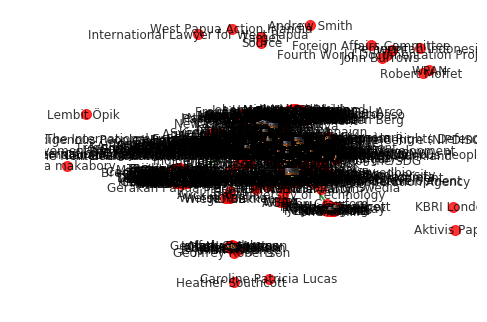

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

#img=mpimg.imread(str(i['LastName'])+'.jpg')
img=mpimg.imread('Capture.png')

#x=time.time()

n=0
a=0.05
b=0.1
G =nx.Graph()
for j in r1:
    if n>=1:
        G.add_node(j['FirstName']) 
    n+=1
        
for i in r:
    if n>=1:     
        G.add_edges_from([(i['FirstName'],i['LastName'])],
                           image=img,size=(list2[list1.index(i['LastName'])])/1000)
        
#         G.add_edges_from([(i['FirstName'],i['LastName'])])
            
    if n==7:
            break
    n+=1


pos=nx.spring_layout(G)
#pos= nx.fruchterman_reingold_layout(G)
#plt.figure(figsize=(10,10))

nx.draw(G,pos,node_size=100,edge_color='green',with_labels=True,width=2,alpha=0.8)
#nx.draw(G,pos,node_size=0.01,edge_lenght=100,with_labels=True)
#print ('im done in :', time.time()-x)

#X=time.time()
ax=plt.gca()
fig=plt.gcf()
label_pos = 0 # middle of edge, halfway between nodes
trans = ax.transData.transform
trans2 = fig.transFigure.inverted().transform
imsize = 0.001 # this is the image size
for (n1,n2) in G.edges():
    (x1,y1) = pos[n1]
    (x2,y2) = pos[n2]
    (x,y) = (x1 * label_pos + x2 * (1.0 - label_pos),
             y1 * label_pos + y2 * (1.0 - label_pos))
    xx,yy = trans((x,y)) # figure coordinates
    xa,ya = trans2((xx,yy)) # axes coordinates
    imsize = G[n1][n2]['size']
    img =  G[n1][n2]['image']
    a = plt.axes([xa-imsize/2.0,ya-imsize/2.0, imsize, imsize ])
    a.imshow(img)
    a.set_aspect('equal')
    a.axis('off')
#print ('im quit in :', time.time()-X)

#plt.figure(figsize=(100,100))

#C=time.time()
#plt.savefig('un.png')
#Image('un.png')
plt.show()
#print ('im resign now:', time.time()-C)